# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [4]:
df.describe()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
count,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,1.387210e+05,138721.000000,138721.000000,138721.000000,138721.000000
mean,408.456679,0.865017,1.224018,92.411768,57.280717,3.852491,3.468364,4.427882,4.287014,72.623256,3.806588,2.389925e+03,236.033152,2.816048,4.768151,0.005745
std,711.300625,0.604681,11.235396,1105.622216,806.837009,2.023177,2.127371,0.994649,0.992454,271.189458,1.039490,4.998821e+04,998.162648,1.497330,0.363702,0.075580
min,1.000000,0.000000,0.000000,0.000000,0.000000,-0.154151,-0.154151,0.265703,0.342945,0.000000,0.265703,1.000000e-02,0.000000,0.182322,0.421214,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.887303,0.716678,3.817305,3.811097,0.000000,3.356462,8.479000e+01,85.190000,1.408767,4.745402,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,5.064533,5.096396,4.422139,4.497450,0.000000,4.114614,1.399900e+02,139.990000,2.929287,4.886641,0.000000
75%,497.000000,1.000000,0.000000,0.000000,0.000000,5.064533,5.096396,5.563677,4.992339,0.029861,4.453620,2.395100e+02,199.754240,3.865009,4.962055,0.000000
max,2000.000000,29.000000,505.000000,258877.420000,258877.420000,5.412885,5.096396,5.563677,5.561934,4019.593056,4.874212,8.999998e+06,132568.670000,5.008490,5.040929,1.000000


# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree and Random fOREST

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [5]:
df.dtypes

accountAge                                        int64
digitalItemCount                                  int64
sumPurchaseCount1Day                              int64
sumPurchaseAmount1Day                           float64
sumPurchaseAmount30Day                          float64
paymentBillingPostalCode - LogOddsForClass_0    float64
accountPostalCode - LogOddsForClass_0           float64
paymentBillingState - LogOddsForClass_0         float64
accountState - LogOddsForClass_0                float64
paymentInstrumentAgeInAccount                   float64
ipState - LogOddsForClass_0                     float64
transactionAmount                               float64
transactionAmountUSD                            float64
ipPostalCode - LogOddsForClass_0                float64
localHour - LogOddsForClass_0                   float64
Label                                             int64
dtype: object

### Split train and test

In [6]:
y = df['Label']
X = df.drop(['Label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [231]:
y.value_counts()

0    137924
1       797
Name: Label, dtype: int64

### Standarize data

In [7]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

### PCA

Text(0,0.5,'cumulative explained variance')

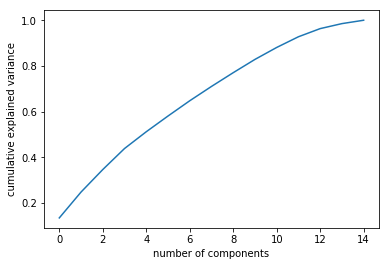

In [8]:
pca = PCA().fit(X_train_s)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

con 10 variables es posible explican el 80% de la variabilidad los datos

In [10]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 10)
# Fit PCA on training set
pca.fit(X_train_s)
# Apply the mapping (transform) to both the training set and the test set.
X_train = pca.transform(X_train_s)
X_test = pca.transform(X_test_s)

print(pca.explained_variance_ratio_)
print("Total explanation: ",sum(pca.explained_variance_ratio_))

[0.13439751 0.11322615 0.09854674 0.09204775 0.07350127 0.06884543
 0.06683842 0.06272319 0.06024085 0.058123  ]
Total explanation:  0.8284903056008418


In [11]:
accuracy_scores = []

### Logistic Regression

In [12]:
lreg = LogisticRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print("F1-score:",metrics.f1_score(y_pred, y_test))
print("F_Beta-Score:",metrics.fbeta_score(y_pred, y_test,10))

accuracy_scores.append(['none','reg-log', -1, -1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   

Accuracy: 0.9939709030538687
F1-score: 0.0
F_Beta-Score: 0.0


### Decision Tree

In [13]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print("F1-score:",metrics.f1_score(y_pred, y_test))
print("F_Beta-Score:",metrics.fbeta_score(y_pred, y_test,10))

accuracy_scores.append(['none','d-tree', -1, -1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   


Accuracy: 0.9883350080824851
F1-score: 0.06643356643356645
F_Beta-Score: 0.06402001668056714


### Random Forest

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print("F1-score:",metrics.f1_score(y_pred, y_test))
print("F_Beta-Score:",metrics.fbeta_score(y_pred, y_test,10))

accuracy_scores.append(['none','random forest', -1, -1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   


Accuracy: 0.9937087684040369
F1-score: 0.03355704697986577
F_Beta-Score: 0.19611650485436893


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [15]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [16]:

for target_percentage in np.arange(0.05,0.55, 0.05):
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 1)
    lreg.fit(X_u,y_u)
    y_pred=rf.predict(X_test)
    accuracy_scores.append(['under-sampling','reg-log',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
    
    dtree.fit(X_u,y_u)
    y_pred=rf.predict(X_test)
    accuracy_scores.append(['under-sampling','d-tree',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
    
    rf.fit(X_u,y_u)
    y_pred=rf.predict(X_test)
    accuracy_scores.append(['under-sampling','random forest',target_percentage,-1,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test),metrics.fbeta_score(y_pred, y_test,10)])   
    
    print("Accuracy:",metrics.accuracy_score(y_pred, y_test),"F1-Score:",metrics.f1_score(y_pred, y_test),"F-Beta:",metrics.fbeta_score(y_pred, y_test,10))


Accuracy: 0.9908252872558871 F1-Score: 0.09482758620689655 F-Beta: 0.11588005215123857
Accuracy: 0.9827428022194067 F1-Score: 0.07925407925407926 F-Beta: 0.05862569355527103
Accuracy: 0.9628642579404955 F1-Score: 0.05450500556173526 F-Beta: 0.032436506636080616
Accuracy: 0.9369566167154528 F1-Score: 0.04563492063492063 F-Beta: 0.025325701826110655
Accuracy: 0.9145877932631395 F1-Score: 0.03931203931203931 F-Beta: 0.021275755381475872
Accuracy: 0.8676438463890952 F1-Score: 0.033498165576647 F-Beta: 0.017684579147037974
Accuracy: 0.8380881646205601 F1-Score: 0.02882599580712788 F-Beta: 0.015095621454533102
Accuracy: 0.8101708244134738 F1-Score: 0.02556627046422965 F-Beta: 0.013317525952057369
Accuracy: 0.7436541570186552 F1-Score: 0.024116424116424118 F-Beta: 0.01246091340324605
Accuracy: 0.7037004674734588 F1-Score: 0.0233294930875576 F-Beta: 0.012016965646402143


# Exercise 15.3

Same analysis using random-over-sampling

In [70]:
y = df['Label']
X = df.drop(['Label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'RandomForest': RandomForestClassifier(),
          'SVM': LinearSVC(dual=False)}

In [79]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)
    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    return X[filter_], y[filter_]

In [80]:
ac_s=[]
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    X_train, y_train = OverSampling(X.values, y, target_percentage, 1)
    y_pred_new = pd.DataFrame (columns =models.keys(),index= y_test.index )
    for i, model  in models.items():
        model.fit(X_train, y_train)
        y_pred_new[i] = model.predict(X_test) 
    for model in models.keys():
        ac_s.append([model, target_percentage, accuracy_score(y_pred_new[model], y_test), f1_score(y_pred_new[model], y_test), fbeta_score(y_pred_new[model], y_test, beta=10)])
ac_s = pd.DataFrame(ac_s, columns=['Model', 'target_percentage', 'Acc', 'F1 Score', 'FBeta Score'])

In [81]:
ac_s

,Model,target_percentage,Acc,F1 Score,FBeta Score
0,Logistic Regression,0.1,0.993993,0.000000,0.000000
1,Decision Tree,0.1,0.999327,0.945946,0.898348
2,RandomForest,0.1,0.999327,0.945946,0.898348
3,SVM,0.1,0.993921,0.000000,0.000000
4,Logistic Regression,0.2,0.993320,0.000000,0.000000
5,Decision Tree,0.2,0.999327,0.945946,0.898348
6,RandomForest,0.2,0.999327,0.945946,0.898348
7,SVM,0.2,0.988394,0.051081,0.049278
8,Logistic Regression,0.3,0.947545,0.039595,0.022384
9,Decision Tree,0.3,0.999327,0.945946,0.898348


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [85]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()  
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  
    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    return X, y

In [86]:
ac_s =[]
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_sm, y_sm = SMOTE(X.values, y, target_percentage, k, seed=3)
        X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)
        for key, value  in models.items():
            value.fit(X_train, y_train)
            y_pred = value.predict(X_test) 
            ac_s.append([key, target_percentage, k, accuracy_score(y_pred, y_test), f1_score(y_pred, y_test), fbeta_score(y_pred, y_test, beta=10)])
ac_s = pd.DataFrame(ac_s, columns=['Model', 'target_percentage','k', 'Acc', 'F1 Score', 'FBeta Score'])

In [87]:
ac_s

,Model,target_percentage,k,Acc,F1 Score,FBeta Score
0,Logistic Regression,0.25,5,0.788617,0.467245,0.646018
1,Decision Tree,0.25,5,0.984067,0.968733,0.967283
2,RandomForest,0.25,5,0.992152,0.984388,0.996182
3,SVM,0.25,5,0.774588,0.380862,0.623975
4,Logistic Regression,0.25,15,0.749955,0.172018,0.523191
5,Decision Tree,0.25,15,0.980714,0.962003,0.964298
6,RandomForest,0.25,15,0.987874,0.975679,0.995654
7,SVM,0.25,15,0.743883,0.061379,0.402484
8,Logistic Regression,0.50,5,0.793076,0.789626,0.808554
9,Decision Tree,0.50,5,0.989088,0.989175,0.988281


# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [89]:
from collections import Counter
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_ada, y_ada, test_size=0.30, random_state=42)
print('Resampled dataset shape %s' % Counter(y_train))
for key, value  in models.items():
    value.fit(X_train, y_train.ravel())
    y_pred = value.predict(X_test)
    print()
    print(key,':')
    print('F1 Score: ', f1_score(y_pred, y_test))
    print('Accurancy: ', accuracy_score(y_pred, y_test))
    print('FBeta Score: ', fbeta_score(y_pred, y_test, beta=10))


Resampled dataset shape Counter({0: 96811, 1: 96202})

Logistic Regression :
F1 Score:  0.6932659751706347
Accurancy:  0.6550210950061048
FBeta Score:  0.6282707354578471

Decision Tree :
F1 Score:  0.9888931535767403
Accurancy:  0.9888057446114046
FBeta Score:  0.9870827651346322

RandomForest :
F1 Score:  0.995884476534296
Accurancy:  0.995865620580022
FBeta Score:  0.9972489791944655

SVM :
F1 Score:  0.6951652354931043
Accurancy:  0.6459544734710654
FBeta Score:  0.6145416765968674


# Exercise 15.6 (3 points)

Compare and comment about the results

Aunque los resultados de las técnicas son diferentes, resulta interesante encontrar los algoritmos ya implementados en la librería imblearn. 

Con este tipo de técnicas han resultado mas favorables los resultados del modelo de regresión logística. Y a nivel de UnderSanmpling el random forest ha presentado mejores resultados.
